<a href="https://colab.research.google.com/github/RitwickJoshi/Colaboratory/blob/master/Cats_Dogs_Detector_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import cv2

In [6]:
main_directory = r'/content/drive/MyDrive/Colab_Notebooks/Dataset'
train_directory = os.path.join(main_directory, 'training')
test_directory = os.path.join(main_directory, 'test')
       

In [7]:
training_generator = ImageDataGenerator(
    width_shift_range=0.15, 
    height_shift_range=0.15,
    rescale = 1./255,
    horizontal_flip = True,
    shear_range = 0.10,
    rotation_range=20,
)

testing_generator = ImageDataGenerator(
    rescale = 1./255
)

In [8]:
trainer = training_generator.flow_from_directory(
    train_directory, 
    batch_size = 20,
    target_size = (180, 180), 
    class_mode = 'binary',
)
tester = testing_generator.flow_from_directory(
    test_directory,
    batch_size = 20,
    target_size = (180, 180),
    class_mode = 'binary',
)



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [224]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [229]:
model = Sequential()

model.add(Conv2D(32, (3,3), kernel_initializer='he_normal', activation='relu', input_shape=(180,180,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))



model.add(Flatten())

model.add(Dense( 
    128, 
    activation='relu', 
    input_shape = (180,180,3),
    kernel_initializer='he_normal'
))

#model.add(Dropout(.5))

model.add(Dense(
    1,
    activation='sigmoid'
))

In [230]:
from keras.optimizers import RMSprop
opti = RMSprop(lr = 1e-3)
model.compile(
    optimizer = opti,
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [233]:
result = model.fit_generator(
    trainer,
    epochs = 50,
    validation_data = tester,
    steps_per_epoch = 100,
    validation_steps = 50
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
100/100 [==============================] - 115s 1s/step - loss: 1.0515 - accuracy: 0.5157 - val_loss: 0.6931 - val_accuracy: 0.5020
Epoch 2/50
100/100 [==============================] - 114s 1s/step - loss: 0.7089 - accuracy: 0.5164 - val_loss: 0.6917 - val_accuracy: 0.5350
Epoch 3/50
100/100 [==============================] - 113s 1s/step - loss: 0.7029 - accuracy: 0.5471 - val_loss: 0.6797 - val_accuracy: 0.5010
Epoch 4/50
100/100 [==============================] - 113s 1s/step - loss: 0.6814 - accuracy: 0.5489 - val_loss: 0.6361 - val_accuracy: 0.6410
Epoch 5/50
100/100 [==============================] - 113s 1s/step - loss: 0.6530 - accuracy: 0.6135 - val_loss: 0.6210 - val_accuracy: 0.6650
Epoch 6/50
100/100 [==============================] - 113s 1s/step - loss: 0.6360 - accuracy: 0.6419 - val_loss: 0.6083 - val_accuracy: 0.6860
Epoch 7/50
100/100 [==============================] - 113s 1s/step - loss: 0.6384 - accuracy: 0.6492 - val_loss: 0.7204 - val_accuracy: 0.6110

In [234]:
acc = result.history['accuracy']
vacc = result.history['val_accuracy']
repeated_for = range(1,len(acc)+1)

loss = result.history['loss']
vloss = result.history['val_loss']
model.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_136 (Conv2D)          (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d_135 (MaxPoolin (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_137 (Conv2D)          (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_136 (MaxPoolin (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_138 (Conv2D)          (None, 41, 41, 64)        36928     
_________________________________________________________________
max_pooling2d_137 (MaxPoolin (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_139 (Conv2D)          (None, 18, 18, 128)     

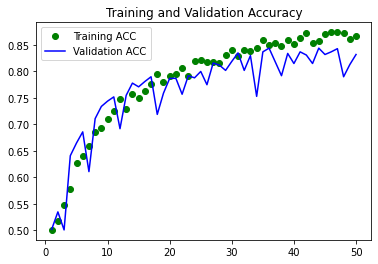

In [235]:
plt.plot(repeated_for, acc, 'go', label = 'Training ACC')
plt.plot(repeated_for, vacc, 'b', label = 'Validation ACC')
plt.title('Training and Validation Accuracy')
plt.legend()


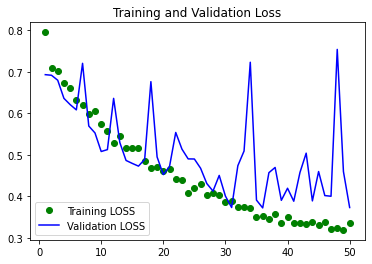

In [236]:
plt.plot(repeated_for, loss, 'go', label = 'Training LOSS')
plt.plot(repeated_for, vloss, 'b', label = 'Validation LOSS')
plt.title('Training and Validation Loss')
plt.legend()


In [237]:
model.save('test_model_50_epochs_3_acc_86.h5')


In [3]:
from keras.models import load_model

md = load_model('/content/drive/MyDrive/Colab_Notebooks/test_model_50_epochs_3_acc_86.h5')
md.layers[0].input_shape

(None, 180, 180, 3)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


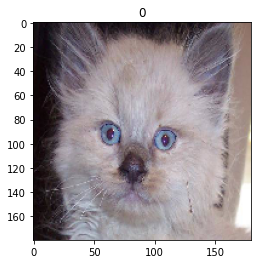

In [9]:
from keras.preprocessing import image
import numpy as np

img_path = (r'/content/drive/MyDrive/Colab_Notebooks/Dataset/training/cats/cat.488.jpg')
img = image.load_img(img_path, target_size=(180,180))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
result=md.predict_classes(img)
plt.title((result[0][0]))
plt.show()

In [12]:
_,accuracy_model = md.evaluate_generator(tester, steps=len(tester), verbose=0)
print(f'{accuracy_model}')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


0.8320000171661377
